In [1]:
import os
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

from src.data.data_reader import DataReader

while str(os.getcwd())[-3:] != 'src':  # Execute from src-directory root
    os.chdir('..')

In [2]:
businesses, reviews, tips = DataReader().read_data()

ValueError: too many values to unpack (expected 3)

(array([212568., 124052., 120791., 328823., 660881.]),
 array([1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 5 artists>)

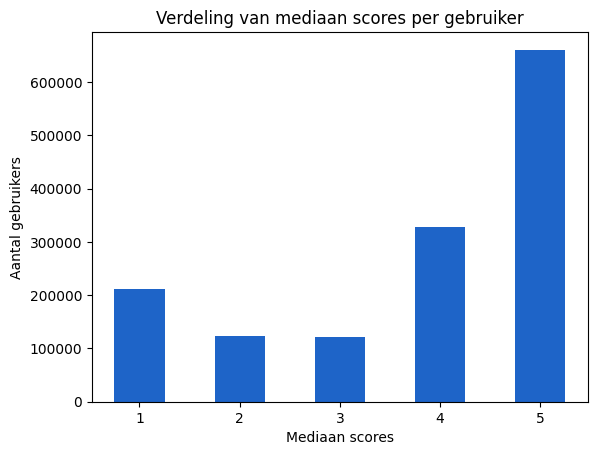

In [4]:
stars_histo = ((reviews.groupby(["user_id"]).median(numeric_only=True)['stars_normalised'] * 4) + 1).round()
plt.title("Verdeling van mediaan scores per gebruiker")
plt.xlabel("Mediaan scores")
plt.ylabel("Aantal gebruikers")
plt.hist(stars_histo, bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.5, color='#1E64C8')

(array([839568., 236407., 111733.,  64118.,  41314.,  28105.,  20694.,
         15563.,  12056.,   9630.,   7691.,   6287.,   5247.,   4537.,
          3751.,   3323.,   2809.,   2411.,   2166.,   3551.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21.]),
 <BarContainer object of 20 artists>)

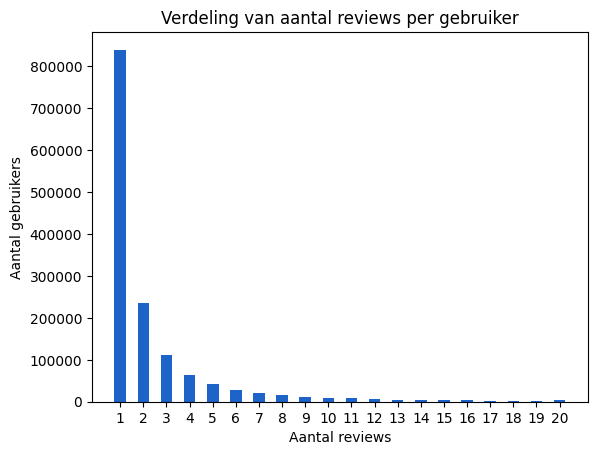

In [69]:
review_count_per_user = reviews.groupby(["user_id"]).count()['stars_normalised']
review_count_per_user.name = 'review_count'

plt.title("Verdeling van aantal reviews per gebruiker")
plt.xlabel("Aantal reviews")
plt.ylabel("Aantal gebruikers")
plt.xticks(np.arange(1, 21, 1.0))
plt.hist(review_count_per_user, align='left', rwidth=0.5, bins=20, range=(1, 21), color='#1E64C8')


(array([ 567659.,  404838.,  543605., 1131544., 2083385.]),
 array([1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 5 artists>)

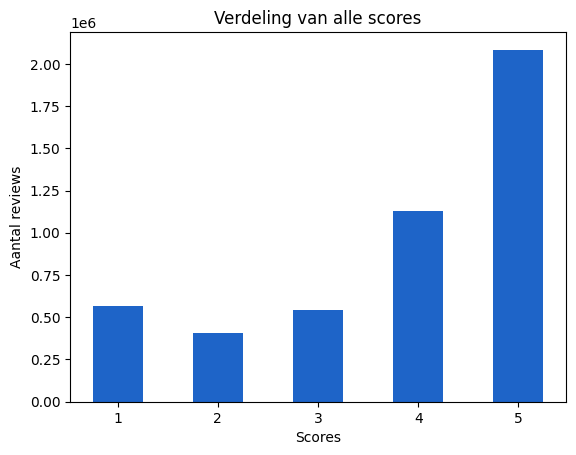

In [10]:
stars_histo = ((reviews['stars_normalised'] * 4) + 1).round()
plt.title("Verdeling van alle scores")
plt.xlabel("Scores")
plt.ylabel("Aantal reviews")
plt.hist(stars_histo, bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.5, color='#1E64C8')

(array([992295., 117401.,  87012.,  93956., 156451.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

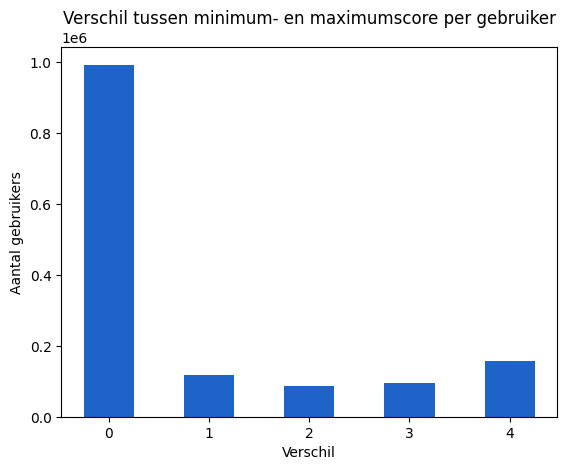

In [20]:
data_min = reviews.groupby(['user_id'])['stars_normalised'].min() * 4 + 1
data_max = reviews.groupby(['user_id'])['stars_normalised'].max() * 4 + 1

data_diff = data_max - data_min
plt.title("Verschil tussen minimum- en maximumscore per gebruiker")
plt.xlabel("Verschil")
plt.ylabel("Aantal gebruikers")
plt.hist(data_diff, bins=[0, 1, 2, 3, 4, 5], align='left', rwidth=0.5, color='#1E64C8')

(array([ 9556., 22708., 32695., 42968., 87362.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

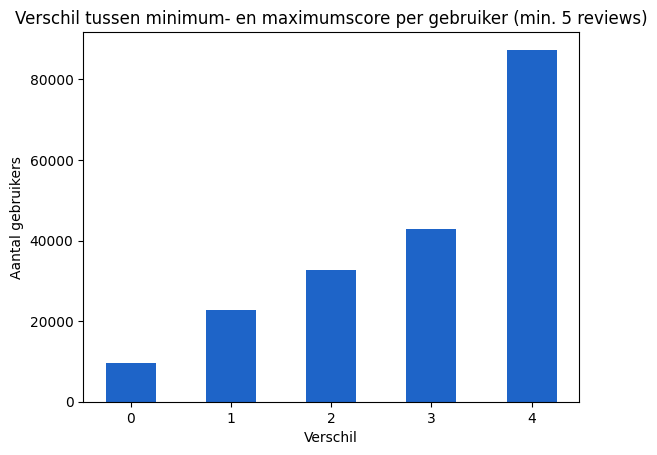

In [82]:
data_min = reviews.groupby(['user_id'])['stars_normalised'].min() * 4 + 1
data_max = reviews.groupby(['user_id'])['stars_normalised'].max() * 4 + 1

data_diff = (data_max - data_min)
data_diff.name = "stars_difference"
reviews_per_user_with_count = pd.concat([data_diff, review_count_per_user], axis=1)
reviews_per_user_with_count = reviews_per_user_with_count[reviews_per_user_with_count['review_count'] >= 5]

plt.title("Verschil tussen minimum- en maximumscore per gebruiker (min. 5 reviews)")
plt.xlabel("Verschil")
plt.ylabel("Aantal gebruikers")
plt.hist(reviews_per_user_with_count['stars_difference'], bins=[0, 1, 2, 3, 4, 5], align='left', rwidth=0.5, color='#1E64C8')

(array([18437., 37875., 49027., 56935., 33015.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

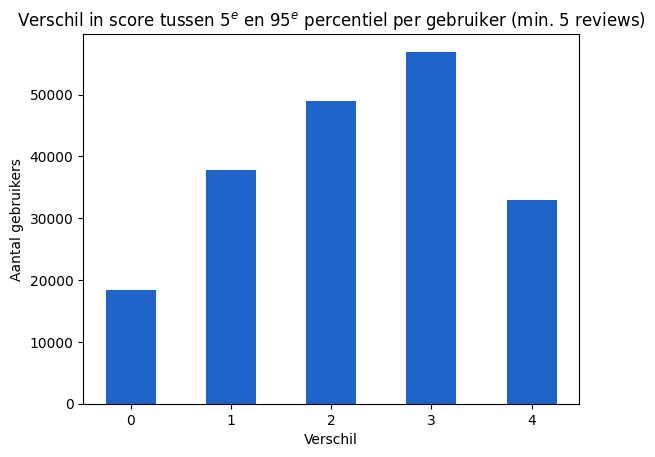

In [81]:
def get_difference_quantile(user_stars):
    return user_stars.quantile(0.95) - user_stars.quantile(0.05)


trans_reviews = reviews.copy(deep = True)
trans_reviews['stars_normalised'] = trans_reviews['stars_normalised'] * 4 + 1
trans_reviews = trans_reviews.join(review_count_per_user, on='user_id')
trans_reviews = trans_reviews[trans_reviews['review_count'] >= 5]
data_diff = trans_reviews.groupby(['user_id'])['stars_normalised'].agg(get_difference_quantile)

plt.title(r"Verschil in score tussen $5^e$ en $95^e$ percentiel per gebruiker (min. 5 reviews)")
plt.xlabel("Verschil")
plt.ylabel("Aantal gebruikers")
plt.hist(data_diff, bins=[0, 1, 2, 3, 4, 5], align='left', rwidth=0.5, color='#1E64C8')

(array([8176., 5683., 4158., 3346., 2706., 2303., 1930., 1678., 1507.,
        1275., 1164., 1043., 1014.,  833.,  846.,  708.,  694.,  650.,
         585.,  510.,  498.,  461.,  473.,  435.,  367.,  371.,  326.,
         349.,  327.,  357.]),
 array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
         60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110.,
        115., 120., 125., 130., 135., 140., 145., 150., 155.]),
 <BarContainer object of 30 artists>)

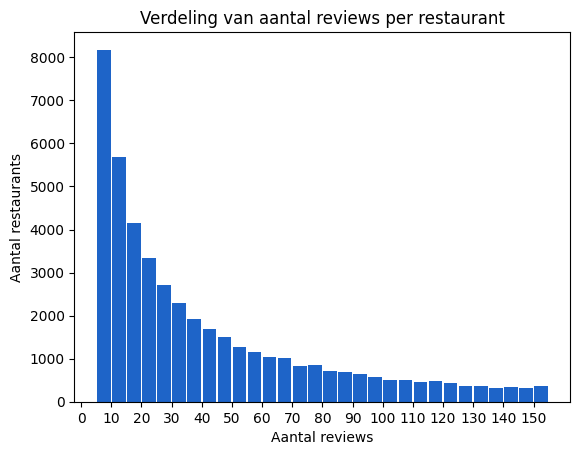

In [103]:
review_count_per_restaurant = reviews.groupby(["business_id"]).count()['stars_normalised']
review_count_per_restaurant.name = 'review_count'

plt.title("Verdeling van aantal reviews per restaurant")
plt.xlabel("Aantal reviews")
plt.ylabel("Aantal restaurants")
amount = 150
base = 5
plt.xticks(np.arange(0, 155, 10))
plt.hist(review_count_per_restaurant, rwidth=0.9, bins=30, range=(base, base + amount), color='#1E64C8')

(array([ 4212.,  5056.,  6647., 21165., 15453.]),
 array([1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 5 artists>)

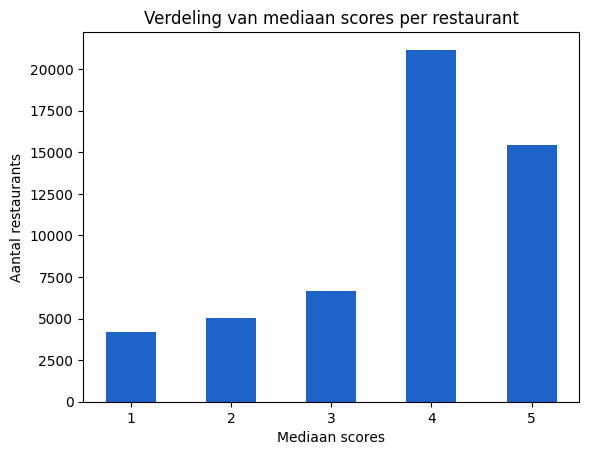

In [104]:
stars_histo = ((reviews.groupby(["business_id"]).median(numeric_only=True)['stars_normalised'] * 4) + 1).round()
plt.title("Verdeling van mediaan scores per restaurant")
plt.xlabel("Mediaan scores")
plt.ylabel("Aantal restaurants")
plt.hist(stars_histo, bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.5, color='#1E64C8')

(array([  467.,  1431.,  2262.,  4410., 43963.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

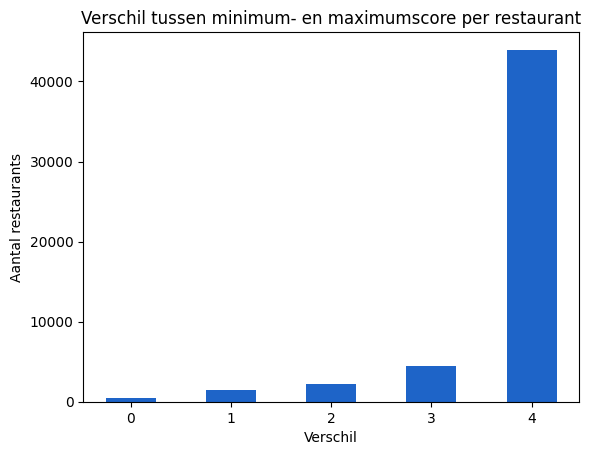

In [106]:
data_min = reviews.groupby(['business_id'])['stars_normalised'].min() * 4 + 1
data_max = reviews.groupby(['business_id'])['stars_normalised'].max() * 4 + 1

data_diff = (data_max - data_min)
data_diff.name = "stars_difference"

plt.title("Verschil tussen minimum- en maximumscore per restaurant")
plt.xlabel("Verschil")
plt.ylabel("Aantal restaurants")
plt.hist(data_diff, bins=[0, 1, 2, 3, 4, 5], align='left', rwidth=0.5, color='#1E64C8')

In [ ]:
def get_difference_quantile(restaurant_stars):
    return restaurant_stars.quantile(0.95) - restaurant_stars.quantile(0.05)


trans_reviews = reviews.copy(deep = True)
trans_reviews['stars_normalised'] = trans_reviews['stars_normalised'] * 4 + 1
data_diff = trans_reviews.groupby(['business_id'])['stars_normalised'].agg(get_difference_quantile)

plt.title(r"Verschil in score tussen $5^e$ en $95^e$ percentiel per restaurant")
plt.xlabel("Verschil")
plt.ylabel("Aantal restaurants")
plt.hist(data_diff, bins=[0, 1, 2, 3, 4, 5], align='left', rwidth=0.5, color='#1E64C8')

NameError: name 'review_count_per_restaurant' is not defined

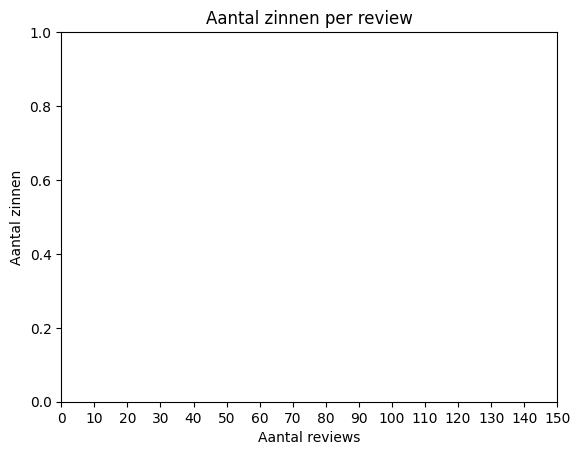

In [12]:
from NLP.utils.sentence_splitter import SentenceSplitter

splitted_sentences = SentenceSplitter()._load_splitted_reviews_from_cache()

splitted_sentences.groupby('review_id').count()

sentences_per_review_count = splitted_sentences.groupby('review_id').count()['text']
sentences_per_review_count.name = 'sentence_count'

(array([115734., 311313., 552664., 610162., 555575., 466309., 378914.,
        304153., 246575., 199068., 163147., 133753., 110058.,  90517.,
         75045.,  62434.,  51833.,  43677.,  36541.,  31027.,  26230.,
         22197.,  19038.,  16428.,  13959.,  11948.,  10222.,   8910.,
          7714.,   6615.,   5696.,   5069.,   4481.,   3807.,   3370.,
          2965.,   2627.,   2299.,   2062.,   3405.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41.]),
 <BarContainer object of 40 artists>)

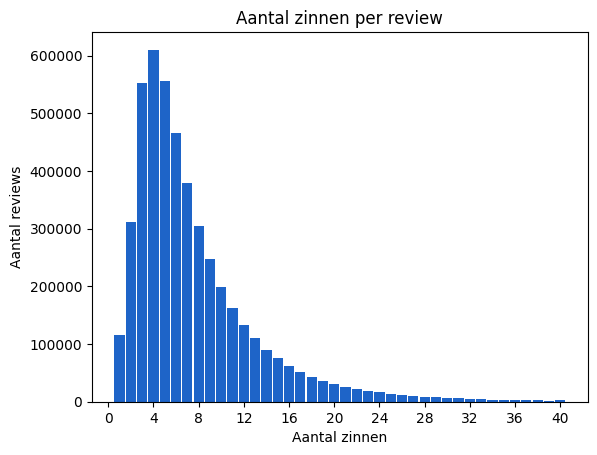

In [49]:
plt.title("Aantal zinnen per review")
plt.xlabel("Aantal zinnen")
plt.ylabel("Aantal reviews")
amount = 40
base = 1
plt.xticks(np.arange(0, 41, 4))
plt.hist(sentences_per_review_count, rwidth=0.9, bins=40, range=(base, base + amount), align='left',  color='#1E64C8')

(array([115734., 311313., 552664., 610162., 555575., 466309., 378914.,
        304153., 246575., 199068., 163147., 133753., 110058.,  90517.,
         75045.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16.]),
 <BarContainer object of 15 artists>)

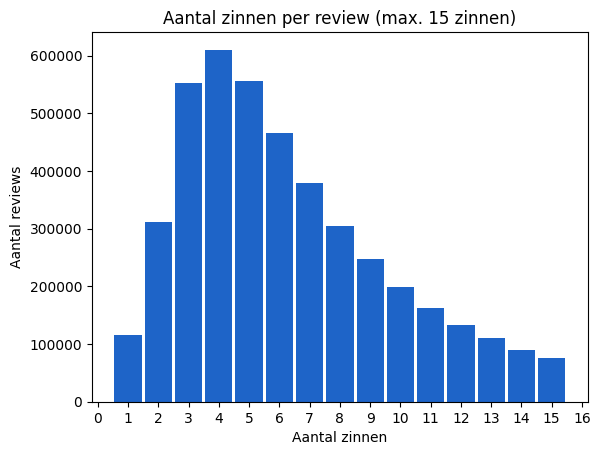

In [53]:
plt.title("Aantal zinnen per review (max. 15 zinnen)")
plt.xlabel("Aantal zinnen")
plt.ylabel("Aantal reviews")
amount = 15
base = 1
plt.xticks(np.arange(0, 17, 1))
plt.hist(sentences_per_review_count.where(sentences_per_review_count < 16), rwidth=0.9, bins=[i for i in range(1, 17)], align='left', range=(base, base + amount), color='#1E64C8')

In [52]:
sentences_per_review_count.where(sentences_per_review_count < 16).agg("mean")

6.2442863843549725

In [50]:
sentences_per_review_count.agg("median")

6.0